# <center> TP 3 : Les methodes de classification sur les données réelles

Dans ce TP, il vous faudra construire des arbres de décision, KNN, SVM et  Forêts aléatoires classificateurs pour l'identification des maladies du cœur.

**Votre travail consiste à écrire du code et effectuer des calculs dans les cellules ci-dessous.**

In this lab, you will build Decision Trees, KNN, SVM and Classifier Random Forests for the identification of heart disease.

**Your job is to write code and perform calculations in the cells below.**

Tout d'abord, nous allons initialiser l'environnement, importons tout les bibliothèques nécessaires

First, we will initialize the environment, import all the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
sns.set()

from IPython.display import Image
from matplotlib import pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 11, 8
%config InlineBackend.figure_format = 'retina'

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.preprocessing import StandardScaler

## 1. SVM method pour la classification : données synthétiques

**Ex.1,2,3**: Séparez en deux classes les données {X, y} en entraînant des [SVM classificateur via sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) avec trois kernels: linéaire, polynôme et gaussien. Visualisez la limite de séparation résultante et les vecteurs du support pour chaque classificateur.

**Ex.1,2,3**: Separate the data {X, y} into two classes by training [SVM classificateur via sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) with three kernels: linear, polynomial and Gaussian. Visualize the resulting separation boundary and support vectors for each classifier.

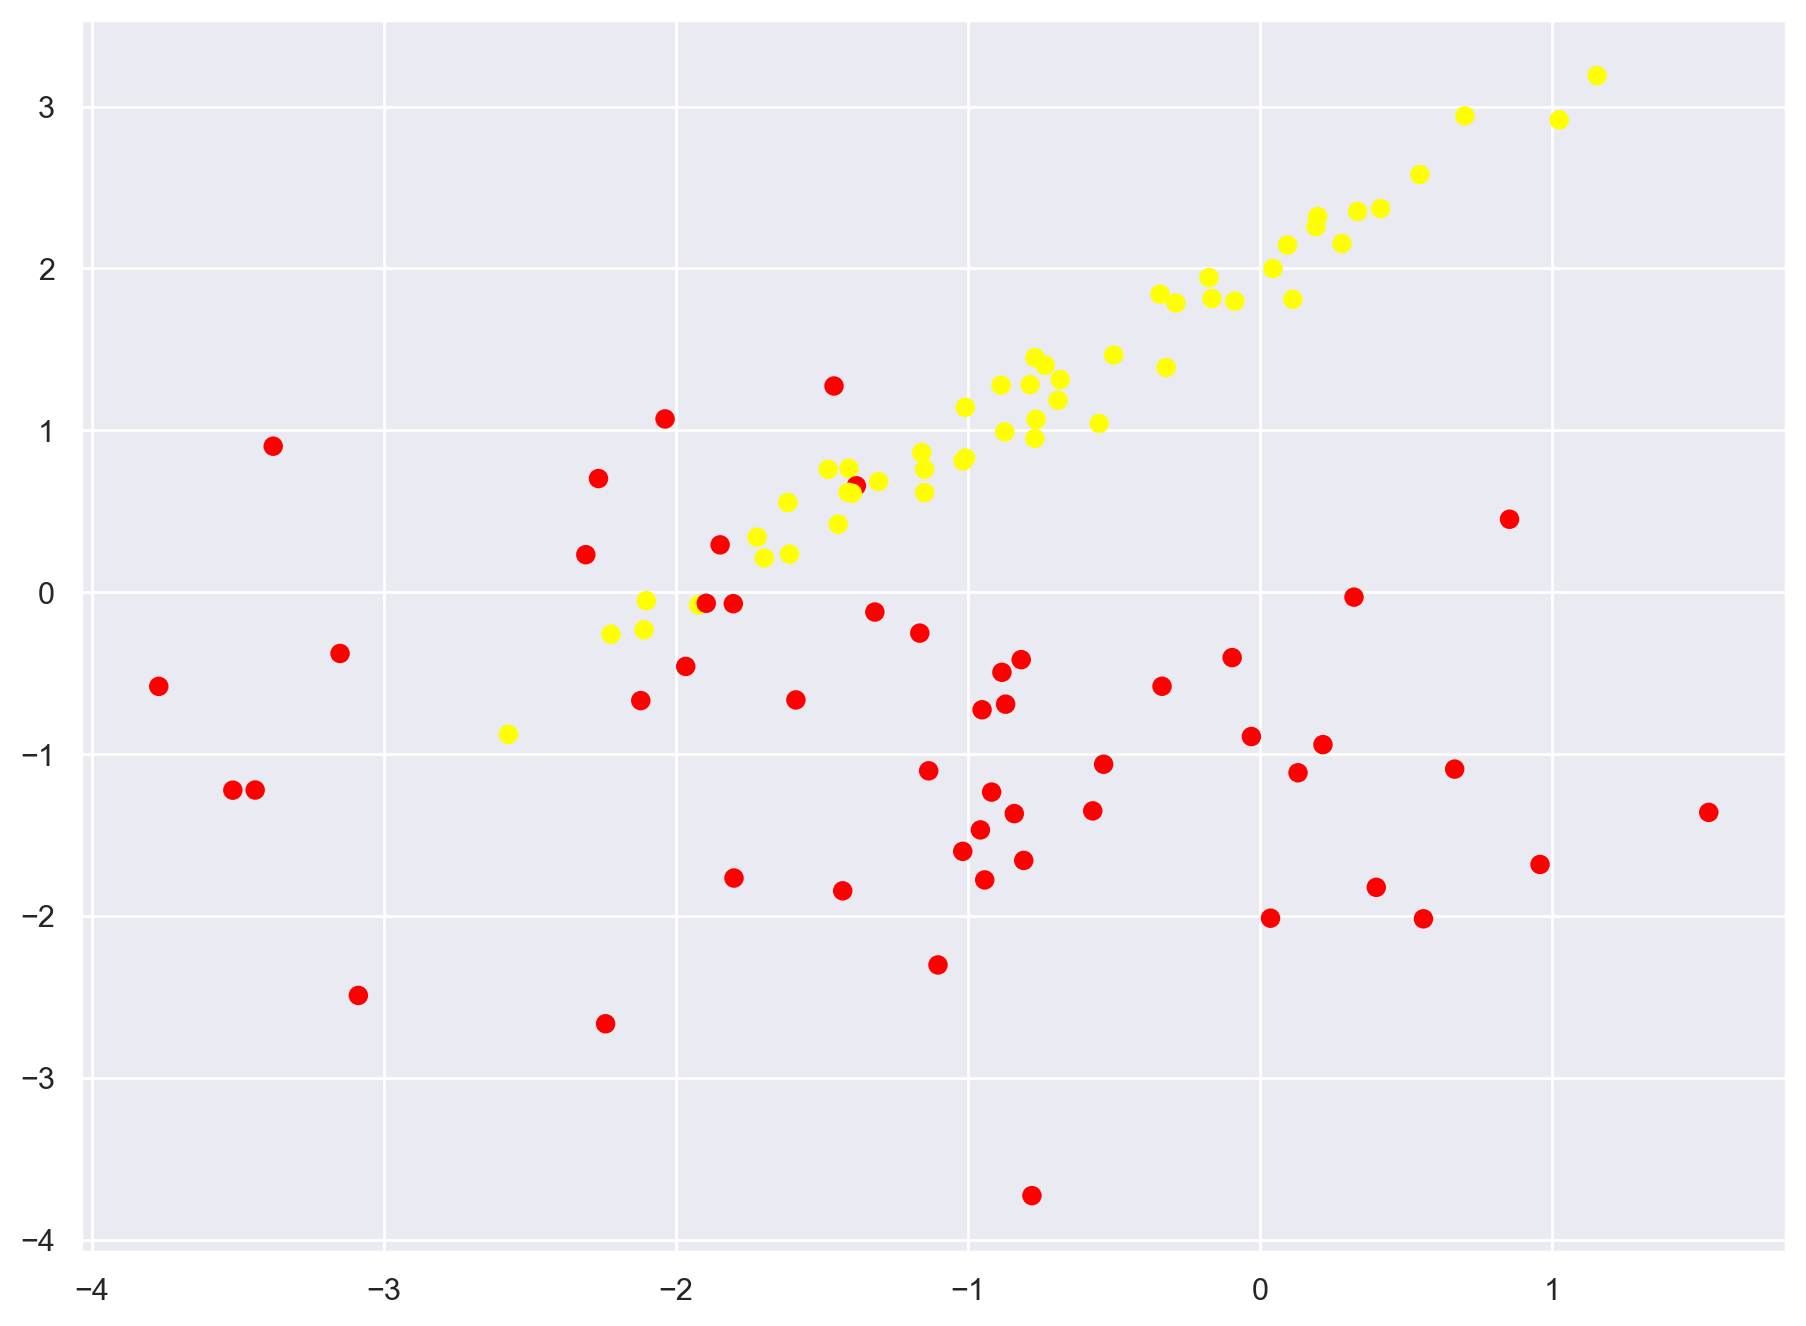

In [2]:
from sklearn.datasets import make_classification
random_state = 4

X, y = make_classification(n_classes=2, n_samples=100, n_informative=2,  n_features=2, n_redundant=0, n_clusters_per_class=1, random_state=random_state)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='autumn')

In [3]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

def apply_metrics(algorithms_, data_, true_labels_, title='', 
                  algorithms_names=["Decision tree", "KNN"]):

  metrics = []
  for algo in algorithms_:
      labels = algo.predict(data_)
      metrics.append(({
          'Accuracy': accuracy_score(true_labels_, labels),
          'Precision': precision_score(true_labels_, labels),
          'Recall': recall_score(true_labels_, labels),
          'F1': f1_score(true_labels_, labels)
          }))

  results = pd.DataFrame(data=metrics, columns=['Accuracy','Precision',
                                                'Recall', 'F1'],
                         index=algorithms_names)
  
  return results

### Function to return the grid for resulting separation limit visualization 
def get_grid(data, eps=0.01):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, eps),
                         np.arange(y_min, y_max, eps))
    
def plot_copmarison(trained_algorithms_,data_train, labels_train, 
                    data_test=[], labels_test=[]):
  
  xx, yy = get_grid(data_train, eps=0.05)
  xy = np.vstack([xx.ravel(), yy.ravel()]).T

  nb_of_algo = len(trained_algorithms_)
  fig, axs = plt.subplots(1, nb_of_algo, figsize=(15, 5))
  for i in range(nb_of_algo):
    algo = trained_algorithms_[i]
    predicted = algo.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    axs[i].pcolormesh(xx, yy, predicted, cmap='autumn')
    axs[i].scatter(data_train[:, 0], data_train[:, 1], c=labels_train, s=100, 
                cmap='autumn', edgecolors='black', linewidth=1., 
                label='Train')
    
    z = algo.decision_function(xy).reshape(xx.shape)
    # plot decision boundary and margins
    axs[i].contour(xx, yy, z, colors="k", levels=[-1, 0, 1], linestyles=["--", "-", "--"])
    # plot support vectors
    axs[i].scatter(algo.support_vectors_[:, 0], algo.support_vectors_[:, 1],
                   s=100, linewidth=2, facecolors="none", edgecolors="k")

    if len(data_test)*len(labels_test):
      axs[i].scatter(data_test[:, 0], data_test[:, 1], c=labels_test, s=100, 
                  cmap='autumn', edgecolors='black', linewidth=5, label='Test')
     
      axs[i].legend()
  plt.show()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
X_train.shape, y_train.shape #number of training examples and num of features

((80, 2), (80,))

In [6]:
svm_lin = svm.SVC(kernel="linear")
svm_lin.fit(X_train, y_train)

svm_poly = svm.SVC(kernel="poly", degree=3)
svm_poly.fit(X_train, y_train)

svm_rbf = svm.SVC(kernel="rbf", gamma=0.7)
svm_rbf.fit(X_train, y_train)

SVC(gamma=0.7)

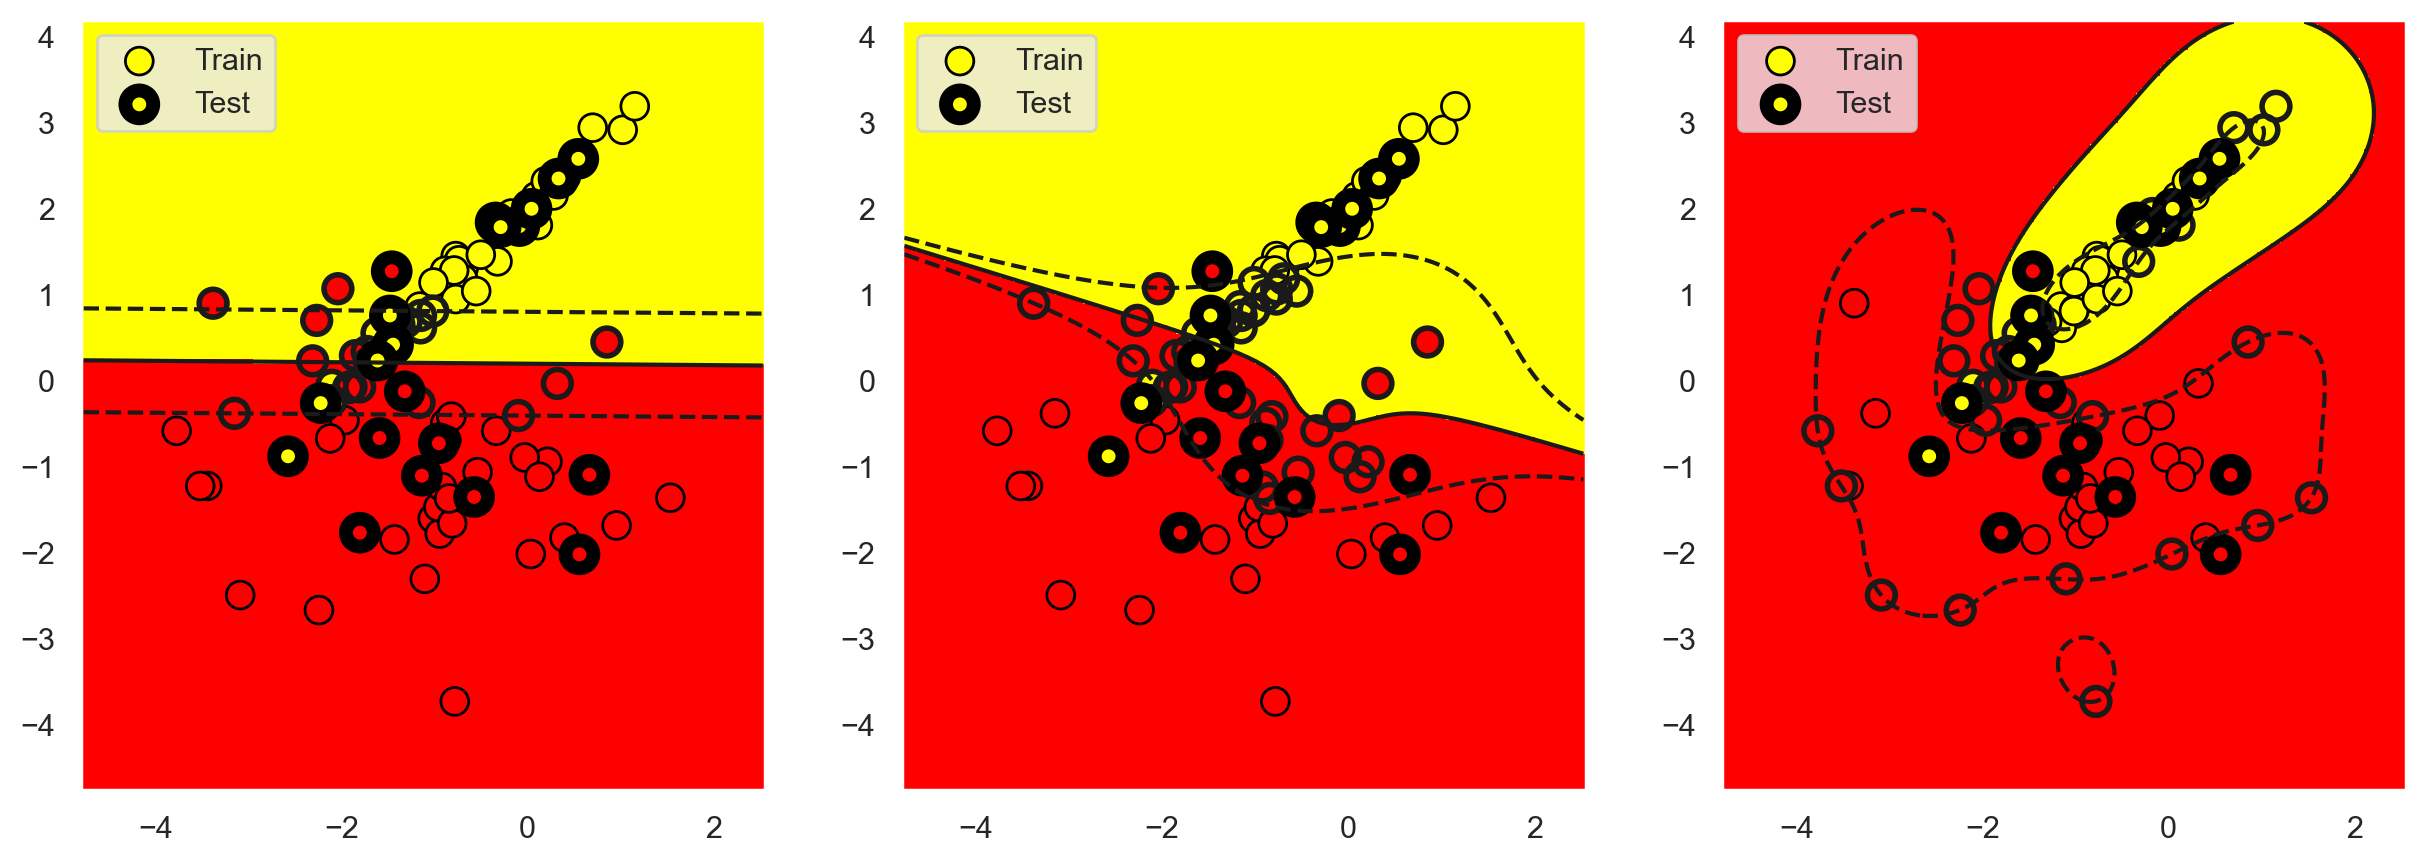

In [7]:
plot_copmarison([svm_lin, svm_poly, svm_rbf],X_train, y_train, X_test, y_test)

**Ex.4,5,6**: Affichez les matrices de confusion [`confusion_matrix`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html), calculez les métriques de qualité de classification : [`Accuracy`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score), [`Precision`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score), [`Recall`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score), [`F1`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score); et visualisez [les courbes du ROC](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py) pour chaque classificateur. Comparez les résultats.

**Ex.4,5,6**: Display [`confusion_matrix`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html), calculate classification quality metrics: [`Accuracy`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score), [`Precision`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score), [`Recall`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score), [`F1`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score); and visualize [ROC curves](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py) for each classifier. Compare results.

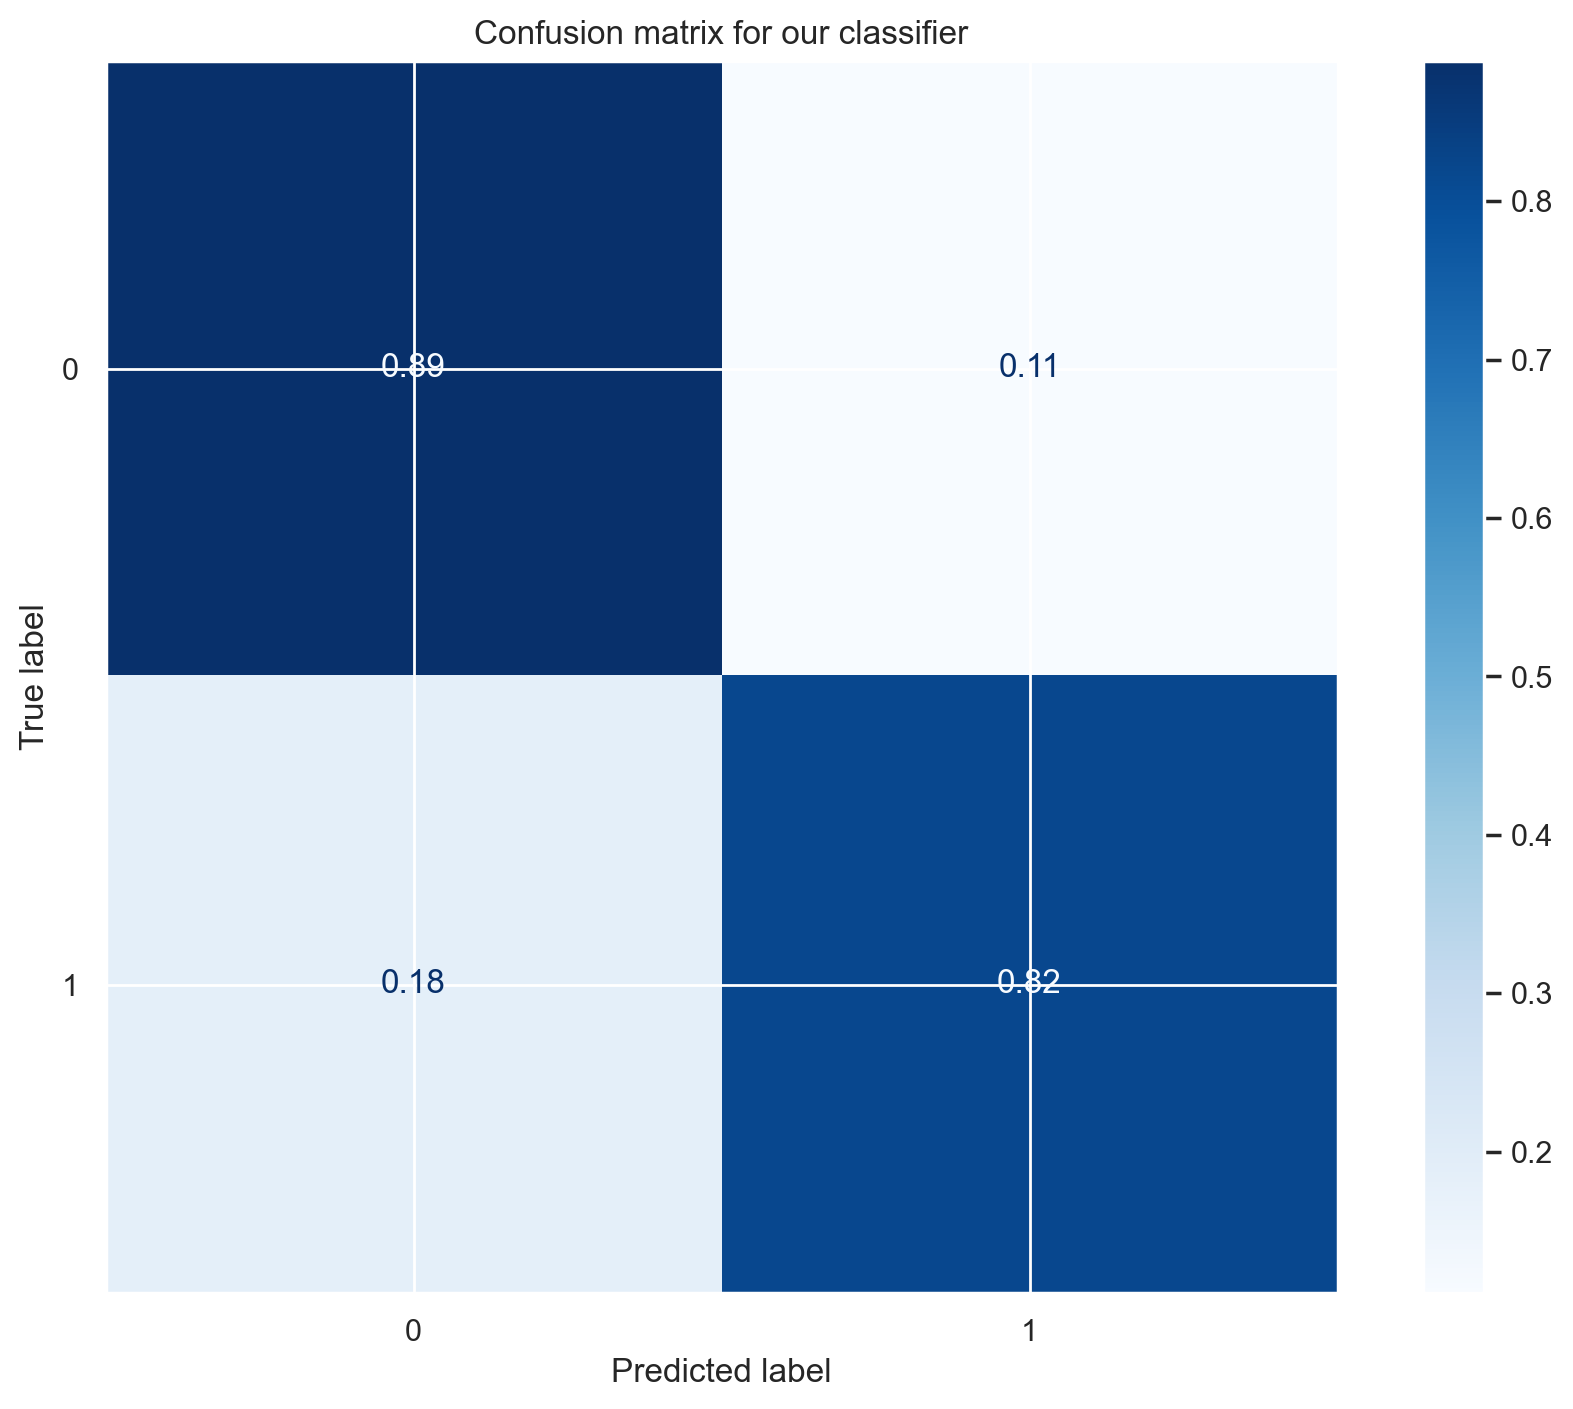

In [8]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Predict the labels using your classifier
y_pred = svm_lin.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred, normalize='true')

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_lin.classes_)
disp.plot(cmap=plt.cm.Blues)

# Add title and show the plot
plt.title('Confusion matrix for our classifier')
plt.show()

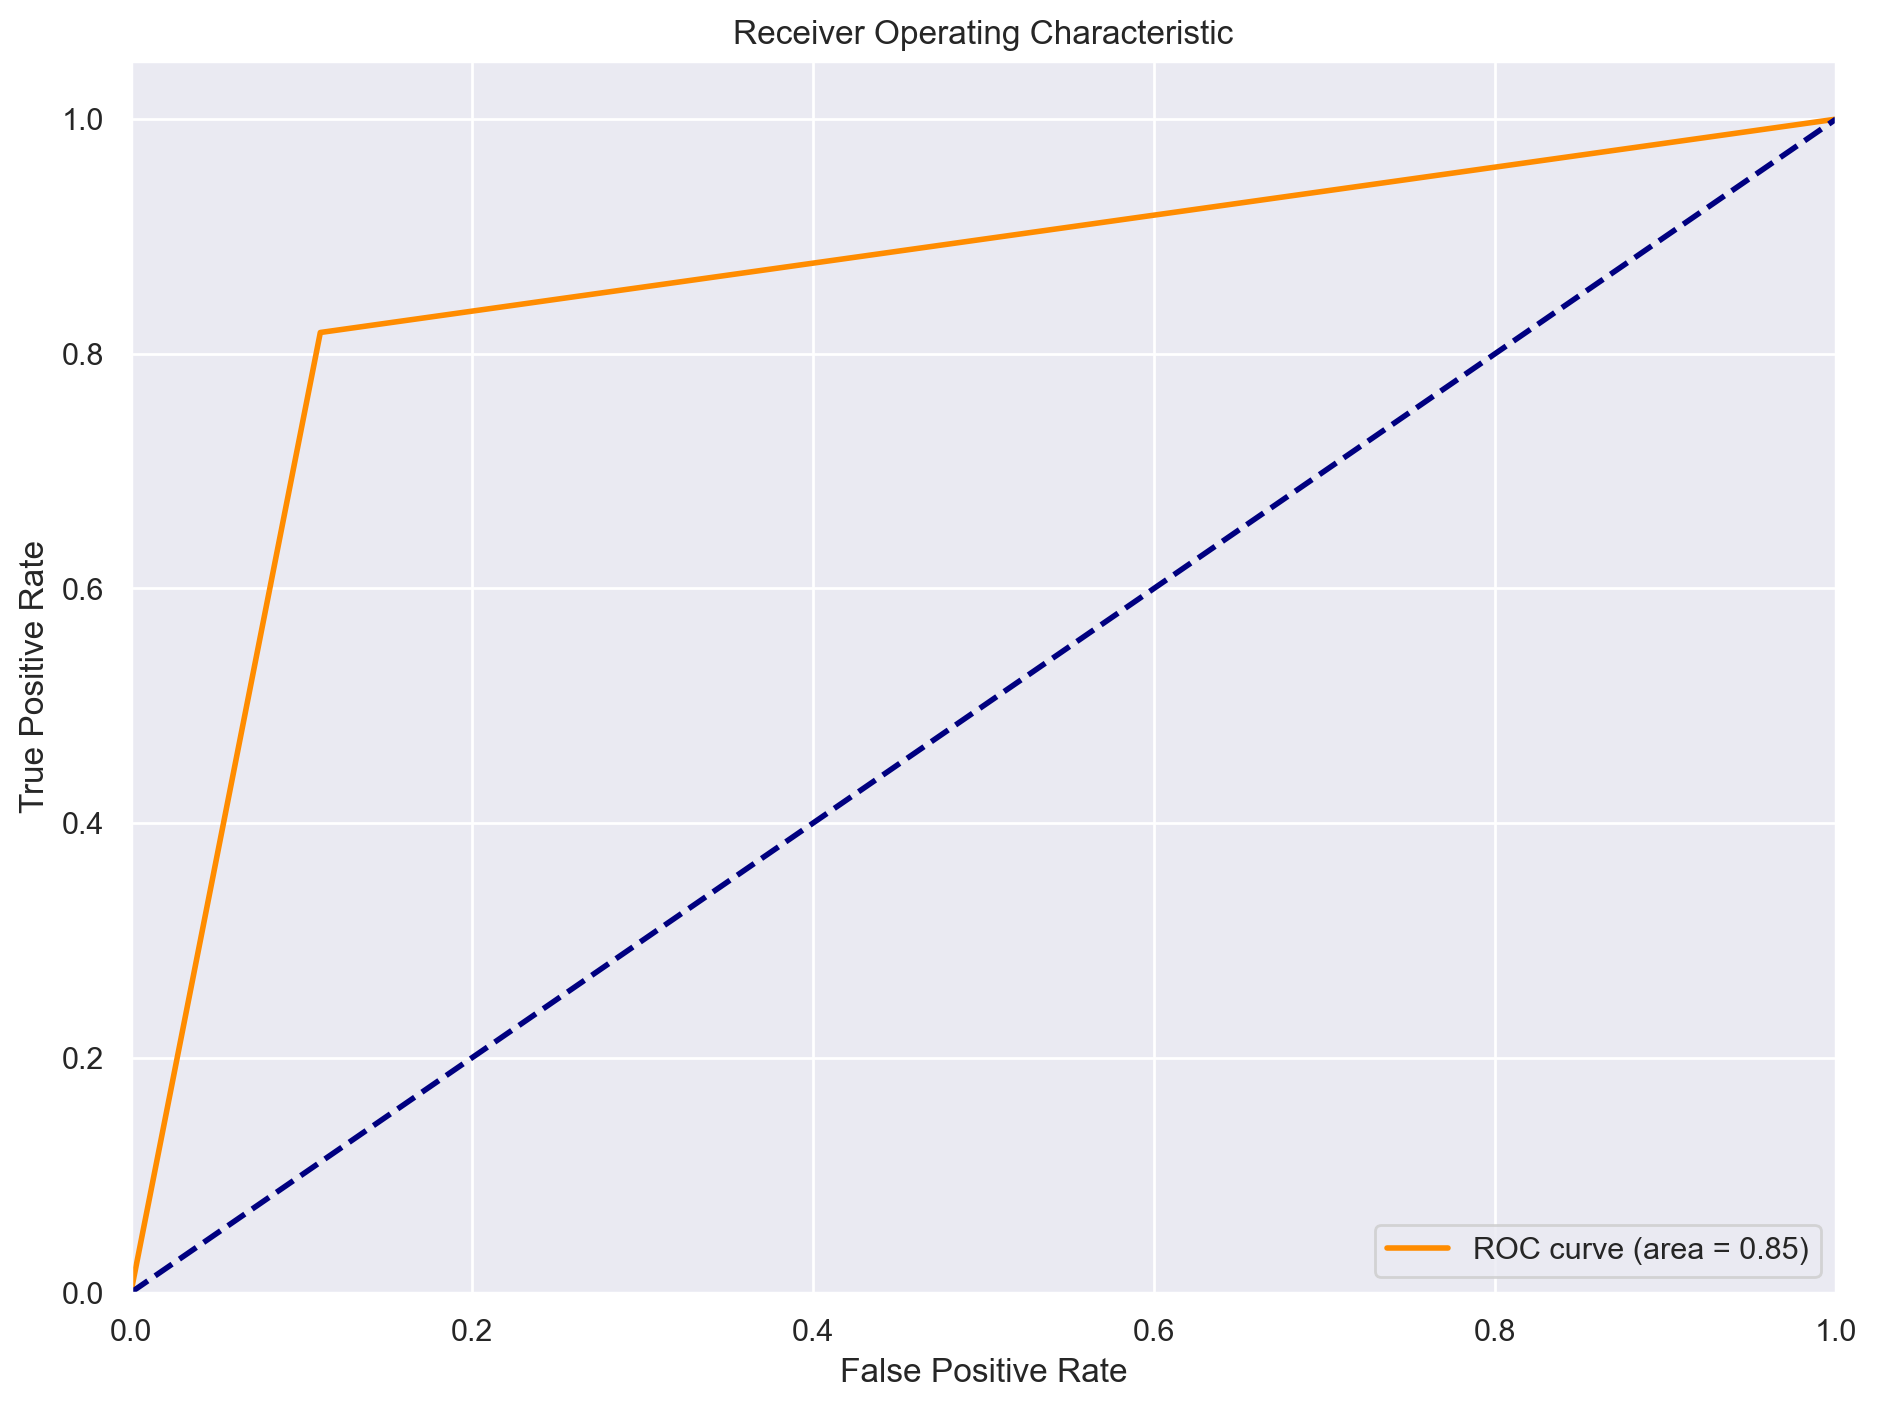

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [10]:
### You code here ###
print('Metrics on training data : \n')
apply_metrics([svm_lin, svm_poly, svm_rbf], X_train, y_train, algorithms_names=["Linear", "Polinomial", "RBF"])

Metrics on training data : 



,Accuracy,Precision,Recall,F1
Linear,0.8625,0.833333,0.897436,0.864198
Polinomial,0.8750,0.871795,0.871795,0.871795
RBF,0.9500,0.972973,0.923077,0.947368


In [11]:
print('Metrics on testing data : \n')
apply_metrics([svm_lin, svm_poly, svm_rbf], X_test, y_test, algorithms_names=["Linear", "Polinomial", "RBF"])

Metrics on testing data : 



,Accuracy,Precision,Recall,F1
Linear,0.85,0.900,0.818182,0.857143
Polinomial,0.75,0.875,0.636364,0.736842
RBF,0.85,0.900,0.818182,0.857143


## 2. Arbres de décision, Forêts aléatoires, KNN and SVM methodes pour prédire les maladies cardiaques

Dans cette partie on va appliquer les méthodes de classification étudiées sur les données explorées dans le TP 1.

### Problème

Prédire la présence ou l'absence de maladie cardiovasculaire (MCV) en utilisant les résultats de l'examen du patient.

### Description des données

Il existe 3 types de caractéristiques d'entrée:

- *Objectives*: informations factuelles;
- *Examinées*: résultats d'un examen médical;
- *Subjectives*: informations données par le patient.

La description des données en anglais :

| Feature | Variable Type | Variable      | Value Type |
|---------|--------------|---------------|------------|
| Age | Objective Feature | age | int (days) |
| Height | Objective Feature | height | int (cm) |
| Weight | Objective Feature | weight | float (kg) |
| Gender | Objective Feature | gender | categorical code |
| Systolic blood pressure | Examination Feature | ap_hi | int |
| Diastolic blood pressure | Examination Feature | ap_lo | int |
| Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
| Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
| Smoking | Subjective Feature | smoke | binary |
| Alcohol intake | Subjective Feature | alco | binary |
| Physical activity | Subjective Feature | active | binary |
| Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

Toutes les valeurs du dataset ont été collectées au moment de l'examen médical.

## 2. Decision Trees, Random Forests, KNN and SVM methods to predict heart disease

In this part we will apply the classification methods studied on the data explored in TP 1.
### Problem

Predict the presence or absence of cardiovascular disease (CVD) using the results of the patient's examination.
### Data Description

There are 3 types of input features:

- *Objective*: factual information;
- *Examined*: results of a medical examination;
- *Subjective*: information given by the patient.


All values in the dataset were collected at the time of the medical examination.


In [12]:
url = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/master/data/mlbootcamp5_train.csv"
df = pd.read_csv(url, sep=';')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


**Ex.7**: Créez un nouveau DataFrame `data` depuis `df` avec les caractéristiques transformées :
- crée "age in years" en divisant l'âge par 365,25 et en prenant le seuil ([x] est le plus grand entier inférieur ou égal à $x$)
- créer 3 caractéristiques binaires basées sur `cholesterol`.
- créer 3 caractéristiques binaires basées sur `gluc`.

Caractéristiques binaires égales à 1, 2 ou 3. Cette méthode est appelée codage factice ou codage à chaud -One Hot Encoding- (OHE). Il est plus pratique d'utiliser [`pandas.get_dummies`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html). Il n’est pas nécessaire d’utiliser les caractéristiques originales `cholestérol` et` gluc` après l’encodage.

**Ex.7**: Create a new DataFrame `data` from `df` with the transformed features:

- create "age in years" by dividing age by 365.25 and taking the threshold ([x] is the largest integer less than or equal to 𝑥

)
- create 3 binary features based on `cholesterol`.
- create 3 binary features based on `gluc`.

Binary features equal to 1, 2 or 3. This method is called dummy encoding or One Hot Encoding (OHE). It is more convenient to use [`pandas.get_dummies`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html). There is no need to use the original cholesterol and gluc features after encoding.

In [13]:
### You code here ###

df['age_in_years']=np.int_(df['age']/365.25)

data = pd.get_dummies(df, prefix = None , prefix_sep = '_' ,
                     dummy_na = False , columns = ["cholesterol", "gluc"] , sparse = False , 
                     drop_first = False , dtype = None )

data.drop(['id','age','cardio'],axis=1,inplace=True)
data.head()

,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,age_in_years,cholesterol_1,cholesterol_2,cholesterol_3,gluc_1,gluc_2,gluc_3
0,2,168,62.0,110,80,0,0,1,50,1,0,0,1,0,0
1,1,156,85.0,140,90,0,0,1,55,0,0,1,1,0,0
2,1,165,64.0,130,70,0,0,0,51,0,0,1,1,0,0
3,2,169,82.0,150,100,0,0,1,48,1,0,0,1,0,0
4,1,156,56.0,100,60,0,0,0,47,1,0,0,1,0,0


**Ex. 8** : Divisez les données en parties d'entraînement et de validation dans la proportion de 7/3 en utilisant [`sklearn.model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) avec` random_state = 17`.

**Ex. 8**: Split the data into training and validation parts in the proportion of 7/3 using [`sklearn.model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) with `random_state = 17`.

In [14]:
y_labels = df['cardio']

# You code here

X_train, X_valid, y_train, y_valid = train_test_split(data, y_labels, test_size=0.3, random_state=17)

**Ex. 9** : Entraînez un arbre de décision ([`sklearn.tree.DecisionTreeClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)) sur le jeu de données `(X _train, y_ train)` avec **max_depth égale à 3** et `random _state = 17`. Tracez cet arbre avec `sklearn.tree.export_graphviz` et Graphviz (code est ci-dessous).

**Ex. 9**: Train a decision tree ([`sklearn.tree.DecisionTreeClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)) on the dataset `(X _train, y_ train)` with **max_depth equal to 3** and `random _state = 17`. Plot this tree with `sklearn.tree.export_graphviz` and Graphviz (code is below).

In [15]:
#!pip install pydotplus, Pillow

import pydotplus 
from sklearn.tree import export_graphviz
from IPython.display import Image

def tree_graph_to_png(tree, feature_names, png_file_to_save):
    tree_str = export_graphviz(tree, feature_names=feature_names, 
                                     filled=True, out_file=None)
    graph = pydotplus.graph_from_dot_data(tree_str)  
    graph.write_png(png_file_to_save)


#tree_graph_to_png(..., png_file_to_save='decision_tree1.png')
#Image("/content/decision_tree1.png")

In [16]:
# You code here
tree_cardio = DecisionTreeClassifier(max_depth=3, random_state=17)
tree_cardio.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=17)

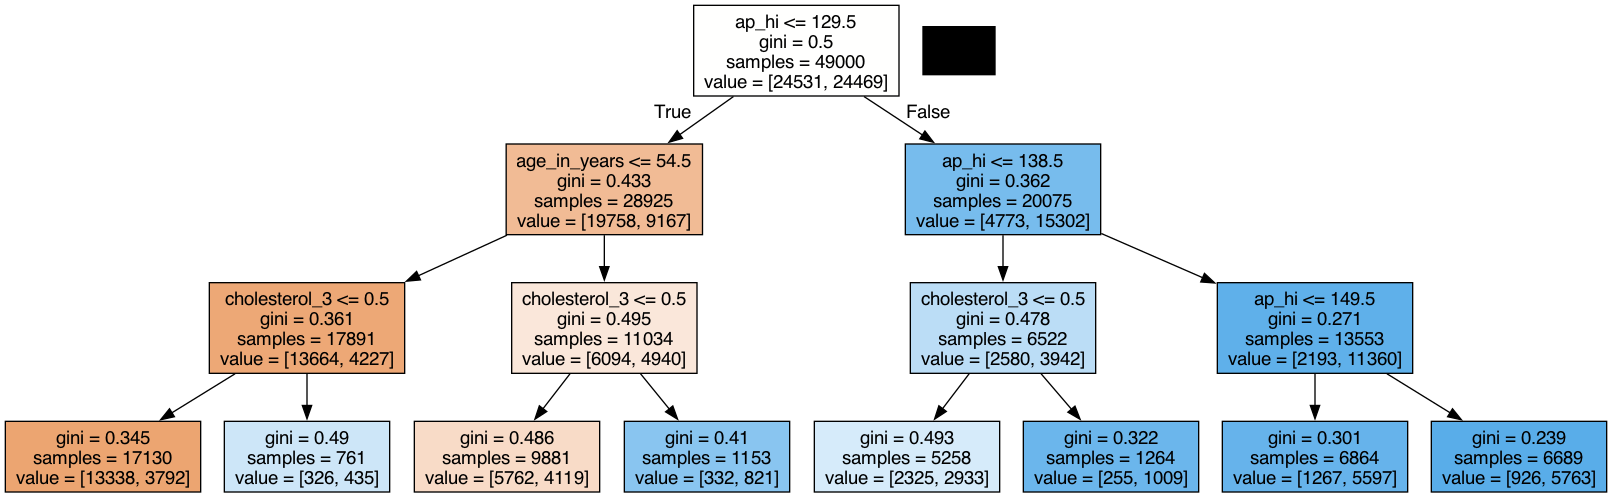

In [17]:
#Check if graphviz is installed on machine!
tree_graph_to_png(tree=tree_cardio, feature_names=X_train.columns,
                 png_file_to_save='decision_tree_cardio.png')

Image("/Users/valeriia/Documents/Lectures/ML/decision_tree_cardio.png")

**Ex. 10** : Quelles sont les 3 caractéristiques utilisées pour effectuer des prédictions dans l'arbre de décision créé?

**Ex. 10**: What are the 3 features used to make predictions in the decision tree created?

**Ex. 11** : Faites des prédictions pour les données de validation `(X_valid, y_valid)` avec l'arbre de décision formé. Calculez les métriques de qualité de classification : [`Accuracy`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score), [`Precision`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score), [`Recall`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score), [`F1`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score).

**Ex. 11**: Make predictions for the validation data `(X_valid, y_valid)` with the trained decision tree. Calculate classification quality metrics: [`Accuracy`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score), [`Precision`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score), [`Recall`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score), [`F1`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score).

In [18]:
# You code here
y_valid_pred = tree_cardio.predict(X_valid)
def apply_metrics(algorithms_, data_, true_labels_, title='', 
                  algorithms_names=["Decision tree", "KNN"]):

  metrics = []
  for algo in algorithms_:
      labels = algo.predict(data_)
      metrics.append(({
          'Accuracy': accuracy_score(true_labels_, labels),
          'Precision': precision_score(true_labels_, labels),
          'Recall': recall_score(true_labels_, labels),
          'F1': f1_score(true_labels_, labels)
          }))

  results = pd.DataFrame(data=metrics, columns=['Accuracy','Precision',
                                                'Recall', 'F1'],
                         index=algorithms_names)
  
  return results

In [19]:
apply_metrics([tree_cardio], X_valid, y_valid, algorithms_names=["Decision tree"])

,Accuracy,Precision,Recall,F1
Decision tree,0.721286,0.747318,0.669458,0.706248


**Ex. 12 (Bonus)** : Définissez la profondeur (depth) de l’arbre à l’aide de la validation croisée sur le jeu de données `(X _train, y_ train)` afin d’améliorer la qualité du modèle. Utilisez [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) avec 5 folds. Fixez `random_state = 17` et changez` max_depth` de 2 à 10.

**Ex. 12 (Bonus)**: Set the depth of the tree using cross-validation on the dataset `(X_train, y_train)` to improve the model quality. Use [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) with 5 folds. Set `random_state = 17` and change `max_depth` from 2 to 10.

In [20]:
from sklearn.model_selection import GridSearchCV

tree_params = {'max_depth': list(range(2, 11))}

tree_grid = GridSearchCV(tree_cardio, tree_params,
                         cv=5, n_jobs=-1, verbose=True)

tree_grid.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=3, random_state=17),
             n_jobs=-1, param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
             verbose=True)

In [21]:
tree_grid.best_params_ 

{'max_depth': 6}

**Ex. 13 (Bonus)** : Tracez le graphique pour montrer comment la précision moyenne change par rapport à la valeur `max_depth` lors de la validation croisée.

**Ex. 13 (Bonus)**: Plot the graph to show how the average accuracy changes with respect to the `max_depth` value during cross-validation.

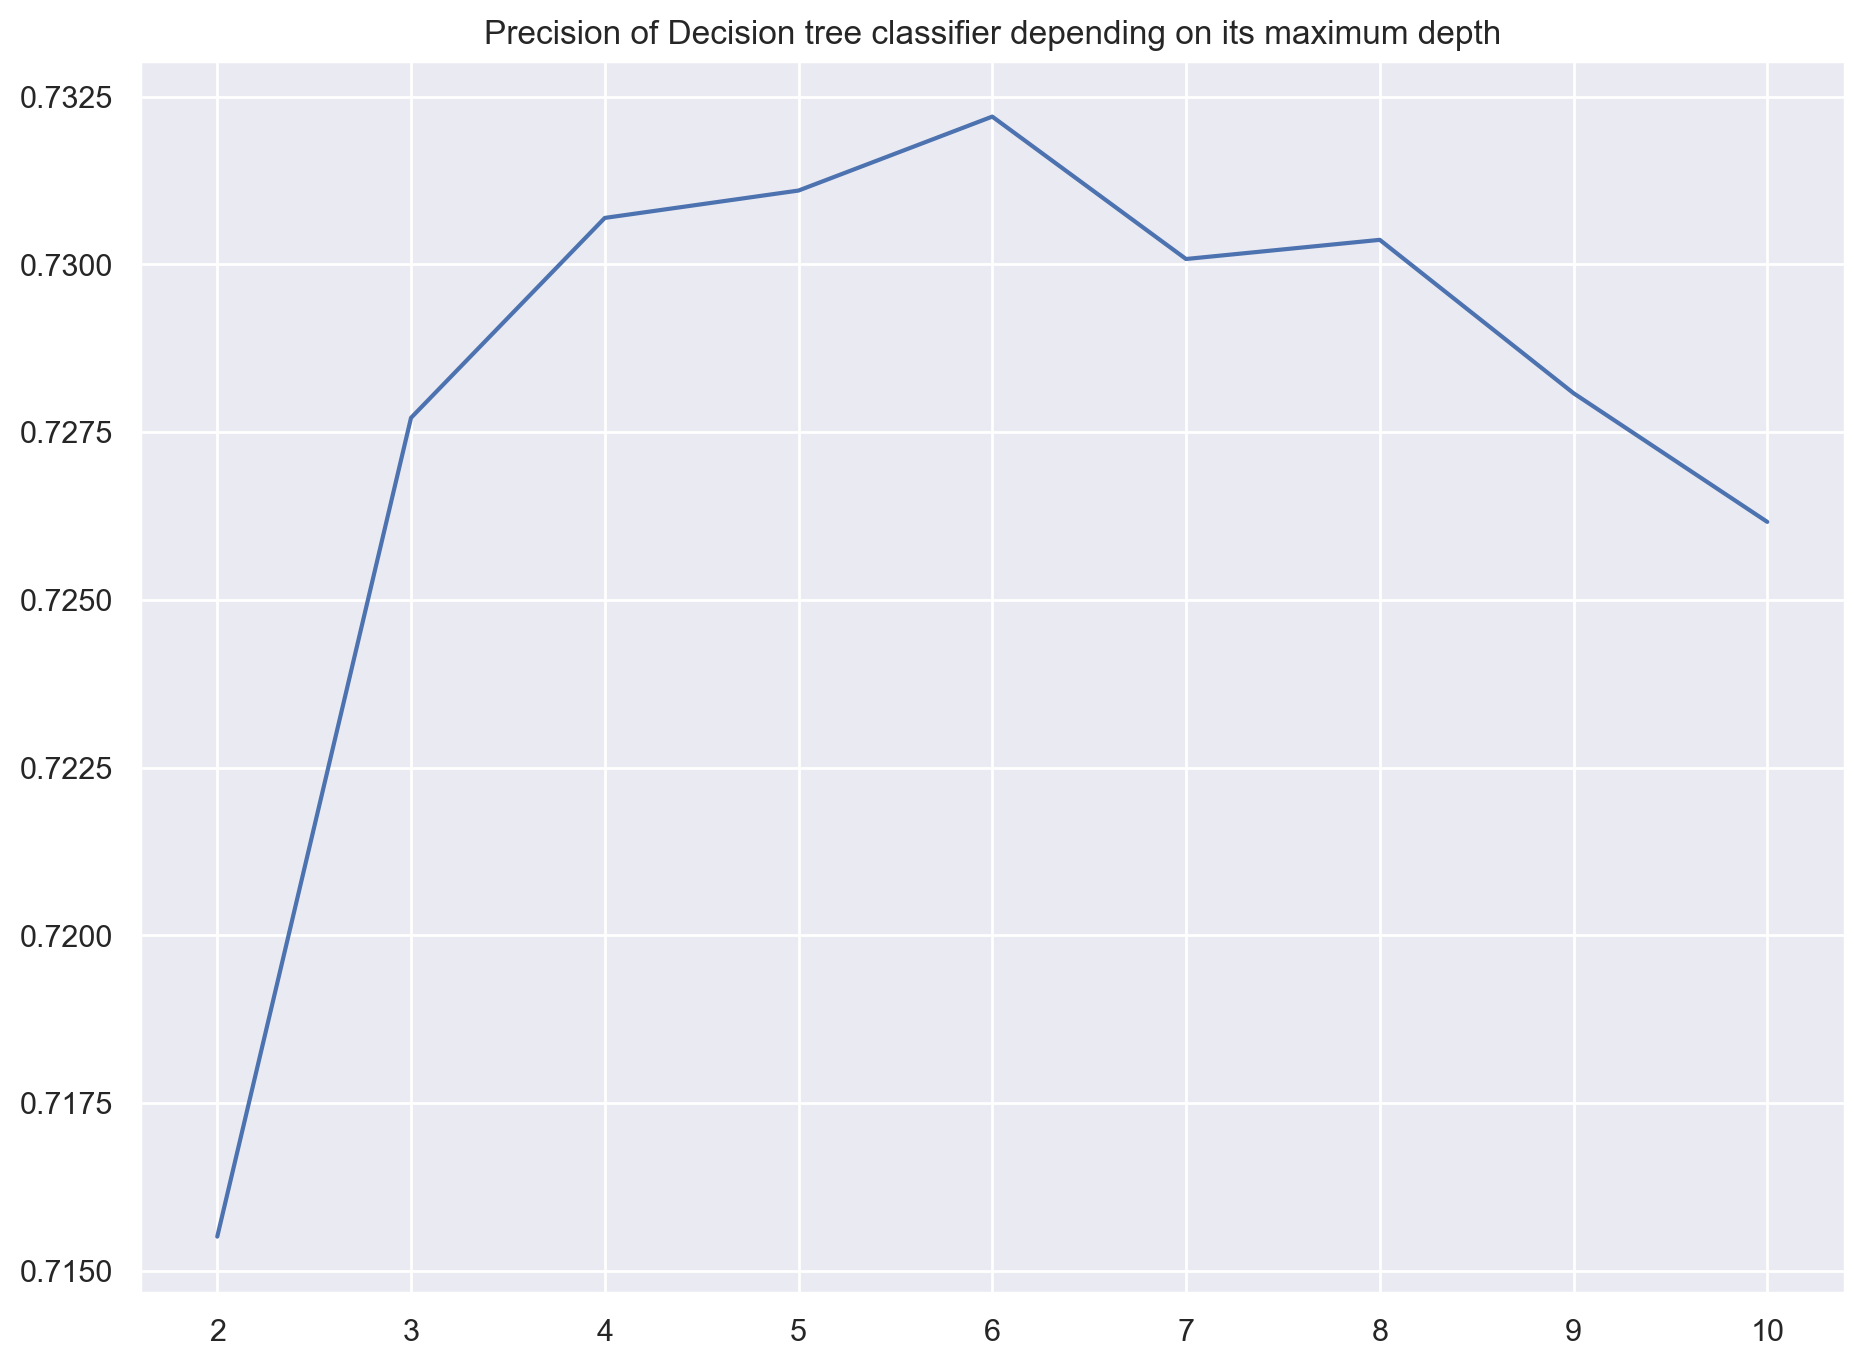

In [22]:
# You code here
from sklearn.model_selection import cross_val_score

precisions = []

for depth in range(2,11) :
    cv_tree_cardio = DecisionTreeClassifier(max_depth=depth,random_state=17)
    precisions.append(np.mean(cross_val_score(cv_tree_cardio, X_train, y_train, cv=5)))

plt.title("Precision of Decision tree classifier depending on its maximum depth")
plt.plot(range(2,11), precisions);

**Ex. 14 (Bonus)** : Affichez la meilleure valeur de `max_depth` où la valeur moyenne de la métrique de qualité de validation croisée atteint son maximum. Calculez également les métriques de qualité de classification : [`Accuracy`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score), [`Precision`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score), [`Recall`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score), [`F1`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score) sur les données de validation; et comparez les résultats avec les résultats obtenus dans l'**Ex.11**.

**Ex. 14 (Bonus)**: Display the best value of `max_depth` where the average value of the cross-validation quality metric reaches its maximum. Also calculate the classification quality metrics: [`Accuracy`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score), [`Precision`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score), [`Recall`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score), [`F1`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score) on validation data; and compare the results with the results obtained in **Ex.11**.

In [23]:
best_tree_cardio = DecisionTreeClassifier(max_depth=6, random_state=17)
y_valid_pred = best_tree_cardio.fit(X_train, y_train).predict(X_valid)
print('Best Precision : ', precision_score(y_valid, y_valid_pred))

Best Precision :  0.7419749312136961


Consultez le tableau SCORE pour évaluer le risque de maladie cardiovasculaire mortelle sur dix ans en Europe. [source](https://academic.oup.com/eurheartj/article/24/11/987/427645).

<img src=https://habrastorage.org/webt/ik/gx/hr/ikgxhr3w1vzqihgitgrbdorfb14.png width=70%>

**Ex. 15** : Créez de nouvelles caractéristiques en fonction de cette image:
- $age \in [40,50), age \in [50,55), age \in [55,60), age \in [60,65) $ (4 caractéristiques)
- systolic blood pressure (tension artérielle systolique) : $ap\_hi \in [120,140), ap\_hi \in [140,160), ap\_hi \in [160,180),$ (3 caractéristiques)

Si les valeurs d'âge ou de pression artérielle ne tombent dans aucun des intervalles, toutes les caractéristiques binaires seront égales à zéro.

See the SCORE table to assess the ten-year risk of fatal cardiovascular disease in Europe. [source](https://academic.oup.com/eurheartj/article/24/11/987/427645).

<img src=https://habrastorage.org/webt/ik/gx/hr/ikgxhr3w1vzqihgitgrbdorfb14.png width=70%>

**Ex. 15** : Create new features based on this image:
- $age \in [40,50), age \in [50,55), age \in [55,60), age \in [60,65), age \in [65,∞)  $ (5 features)
- systolic blood pressure : $ap\_hi \in [120,140), ap\_hi \in [140,160), ap\_hi \in [160,180), ap\_hi \in [180,∞)$ (4 features)

If the age or blood pressure values ​​do not fall into any of the intervals, all binary features will be zero.

In [24]:
# You code here
# Define intervals and their labels
age_intervals = [40, 50, 55, 60, 65, float('inf')] 
age_labels = ['age_[40,50)', 'age_[50,55)', 'age_[55,60)', 'age_[60,65)', 'age_[65,∞)']

bp_intervals = [120, 140, 160, 180, float('inf')]
bp_labels = ['bp_[120,140)', 'bp_[140,160)', 'bp_[160,180)', 'bp_[180,∞)']

# Create binary features for age
age_dummies = pd.get_dummies(
    pd.cut(df['age_in_years'], bins=age_intervals, labels=age_labels, right=False)
).reindex(columns=age_labels, fill_value=0)

# Create binary features for systolic blood pressure
bp_dummies = pd.get_dummies(
    pd.cut(df['ap_hi'], bins=bp_intervals, labels=bp_labels, right=False)
).reindex(columns=bp_labels, fill_value=0)

# Combine the binary features
df = pd.concat([df, age_dummies, bp_dummies], axis=1)

# Set 0 if both are not in the intervals
df.loc[
    ((df['age_in_years'] < 40) | (df['age_in_years'] >= 65)) & 
    ((df['ap_hi'] > 180) | (df['ap_hi'] < 120)),
    ['age_[40,50)', 'age_[50,55)', 'age_[55,60)', 'age_[60,65)', 'age_[65,∞)',
     'bp_[120,140)', 'bp_[140,160)', 'bp_[160,180)', 'bp_[180,∞)']
] = 0
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,...,age_in_years,"age_[40,50)","age_[50,55)","age_[55,60)","age_[60,65)","age_[65,∞)","bp_[120,140)","bp_[140,160)","bp_[160,180)","bp_[180,∞)"
0,0,18393,2,168,62.0,110,80,1,1,0,...,50,0,1,0,0,0,0,0,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,...,55,0,0,1,0,0,0,1,0,0
2,2,18857,1,165,64.0,130,70,3,1,0,...,51,0,1,0,0,0,1,0,0,0
3,3,17623,2,169,82.0,150,100,1,1,0,...,48,1,0,0,0,0,0,1,0,0
4,4,17474,1,156,56.0,100,60,1,1,0,...,47,1,0,0,0,0,0,0,0,0


**Ex. 16** : Modifiez les caractéristiques `cholesterol` et `gender`. Transformez le `cholestérol` en 3 caractéristiques binaires en fonction de ses 3 valeurs uniques (`cholestérol` = 1, `cholestérol` = 2 et `cholestérol` = 3). Transformez le `sexe` de 1 et 2 en 0 et 1. Il vaut mieux le renommer en `male` (0 - woman, 1 - man). En général, cela se fait généralement avec [`sklearn.preprocessing.LabelEncoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) mais ici, dans le cas de 2 valeurs uniques, ce n'est pas nécessaire.

**Ex. 16**: Change the features `cholesterol` and `gender`. Transform `cholesterol` into 3 binary features based on its 3 unique values ​​(`cholesterol` = 1, `cholesterol` = 2, and `cholesterol` = 3). Transform `sex` from 1 and 2 to 0 and 1. It is better to rename it to `male` (0 - woman, 1 - man). Usually, this is usually done with [`sklearn.preprocessing.LabelEncoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) but here, in the case of 2 unique values, it is not necessary.

In [25]:
# You code here
df = pd.get_dummies(df, prefix = None , prefix_sep = '_' ,
                     dummy_na = False , columns = ["cholesterol"] , sparse = False , 
                     drop_first = False , dtype = None )

# Transform gender (1 and 2) to male (0 - woman, 1 - man)
df['male'] = df['gender'].apply(lambda x: 1 if x == 2 else 0)
df.drop(['gender'],axis=1,inplace=True)
df.head()

,id,age,height,weight,ap_hi,ap_lo,gluc,smoke,alco,active,...,"age_[60,65)","age_[65,∞)","bp_[120,140)","bp_[140,160)","bp_[160,180)","bp_[180,∞)",cholesterol_1,cholesterol_2,cholesterol_3,male
0,0,18393,168,62.0,110,80,1,0,0,1,...,0,0,0,0,0,0,1,0,0,1
1,1,20228,156,85.0,140,90,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0
2,2,18857,165,64.0,130,70,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,3,17623,169,82.0,150,100,1,0,0,1,...,0,0,0,1,0,0,1,0,0,1
4,4,17474,156,56.0,100,60,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


**Ex. 17** : Enfin, créez un arbre de décision ([`sklearn.tree.DecisionTreeClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)) à l'aide de ces 12 caractéristiques binaires : 4 de l'age, 3 de tension artérielle systolique, 1 `smoke`, 3 du cholesterol et 1 `male` (à l'exclusion de toutes les caractéristiques d'origine dont nous disposions avant cette partie ingénierie des caractéristiques).

Créez votre arbre de décision avec la limitation `max_depth = 3` and `random_state = 17` (tous les autres arguments doivent être conservés avec leurs valeurs par défaut), entraînez-le sur l'ensemble des données d'entraînement.

**Ex. 17**: Finally, create a decision tree ([`sklearn.tree.DecisionTreeClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)) using these 12 binary features: 4 age, 3 systolic blood pressure, 1 `smoke`, 3 cholesterol, and 1 `male` (excluding all the original features we had before this feature engineering part).

Create your decision tree with the limitation `max_depth = 3` and `random_state = 17` (all other arguments should be kept with their default values), train it on the training dataset.

In [26]:
# You code here
#Keep only data we need 
df=df[['smoke', 'age_[40,50)', 'age_[50,55)', 'age_[55,60)', 'age_[60,65)', 'age_[65,∞)',
     'bp_[120,140)', 'bp_[140,160)', 'bp_[160,180)', 'bp_[180,∞)', 'cholesterol_1', 
    'cholesterol_2',  'cholesterol_3', 'male', 'cardio']]

X = df.drop(columns=['cardio'])
y = df['cardio']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)
tree = DecisionTreeClassifier(max_depth=3, random_state=17)
tree.fit(X_train, y_train)

# Test the classifier
accuracy = tree.score(X_test, y_test)
print("Model accuracy on test data:", accuracy)

Model accuracy on test data: 0.704047619047619


**Ex. 18** : Quelle caractéristique binaire est la plus importante pour la détection des maladies cardiaques (c’est-à-dire celle est placée à la racine (root) de l’arbre)?

**Ex. 18**: Which binary feature is most important for detecting heart disease (i.e. the one placed at the root of the tree)?

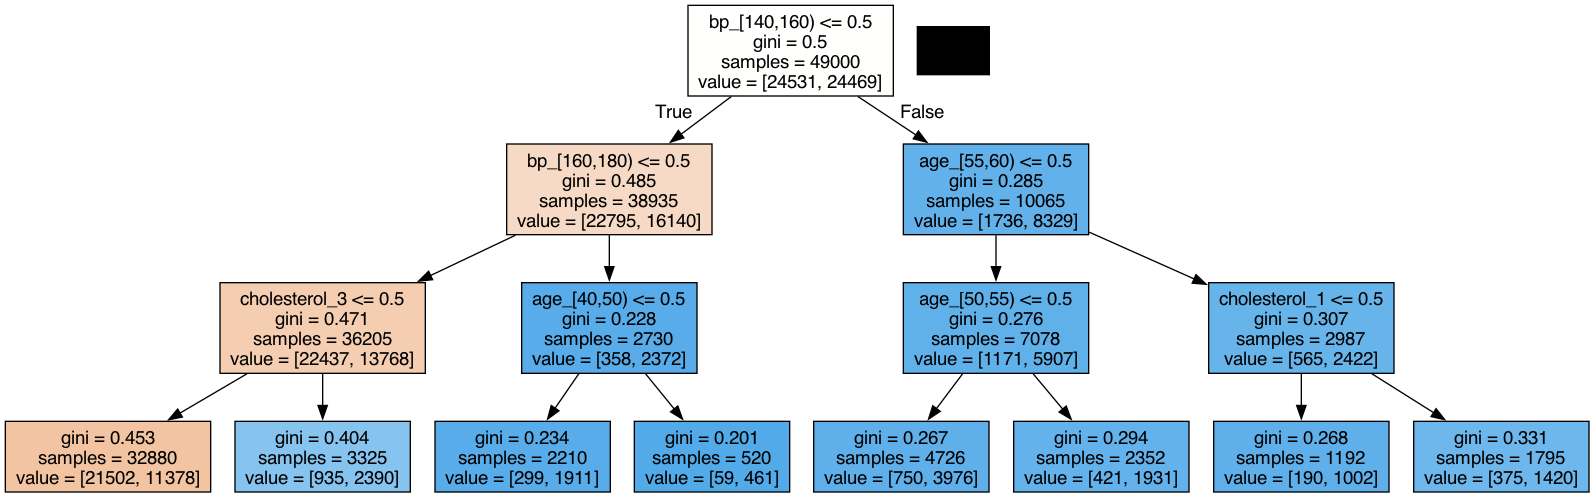

In [27]:
# You code here
#Check if graphviz is installed on machine!
tree_graph_to_png(tree=tree, feature_names=X_train.columns,
                 png_file_to_save='decision_tree_cardio.png')

Image("/Users/valeriia/Documents/Lectures/ML/decision_tree_cardio.png")

**Ex. 19 (Bonus)** : Appliquez les k-NN ([`sklearn.neighbors.KNeighborsClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)), Forêt aléatoire ([`sklearn.ensemble.RandomForestClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)) et [`SVM`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) méthodes sur les données utilisées dans l'**Ex. 17** (celles avec 12 caractéristiques binaires). Utilisez la Validation Croisée pour avoir de meilleurs résultats.

**Ex. 19 (Bonus)**: Apply the k-NN ([`sklearn.neighbors.KNeighborsClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)), Random Forest ([`sklearn.ensemble.RandomForestClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)) and [`SVM`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) methods on the data used in **Ex. 17** (the ones with 12 binary features). Use Cross-Validation for better results.

In [28]:
# Random forest
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(random_state=17)
forest.fit(X_train, y_train)

# Stratified K-Fold for cross-validation
forest_params = {'max_depth': range(1, 5),
                 'max_features': range(1, 15)}

forest_grid = GridSearchCV(forest, forest_params,
                           cv=5, n_jobs=-1, verbose=True)

forest_grid.fit(X_train, y_train)

Fitting 5 folds for each of 56 candidates, totalling 280 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=17), n_jobs=-1,
             param_grid={'max_depth': range(1, 5),
                         'max_features': range(1, 15)},
             verbose=True)

In [29]:
forest_grid.best_params_, forest_grid.best_score_

({'max_depth': 4, 'max_features': 4}, 0.7154897959183673)

In [30]:
# k-NN Classifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
np.mean(cross_val_score(knn, X_train, y_train, cv=5))

0.623938775510204

In [31]:
# 3. Support Vector Machine (SVM)
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=17)
svm_lin = svm.SVC(kernel="linear")
svm_scores = cross_val_score(svm_lin, X_train, y_train, cv=skf, scoring='accuracy')
svm_lin.fit(X_train, y_train)
print(f'SVM Accuracy: {np.mean(svm_scores):.4f}')

SVM Accuracy: 0.7152


**Ex. 20 (Bonus)** :  Calculez les métriques de qualité de classification : [`Accuracy`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score), [`Precision`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score), [`Recall`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score), [`F1`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score) pour chaque classificateur (DT, KNN, RF et SVM); et affichez les resultats sous forme de tableau.

**Ex. 20 (Bonus)**: Calculate classification quality metrics: [`Accuracy`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score), [`Precision`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score), [`Recall`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score), [`F1`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score) for each classifier (DT, KNN, RF and SVM); and display the results in table form.

In [32]:
apply_metrics([tree, knn, forest_grid, svm_lin], X_test, y_test, algorithms_names=["DT","KNN","RF","SVM"])

,Accuracy,Precision,Recall,F1
DT,0.704048,0.811097,0.532731,0.643083
KNN,0.639905,0.676105,0.538440,0.599470
RF,0.714000,0.804324,0.566318,0.664657
SVM,0.712381,0.812762,0.552617,0.657907
